# Regressió lineal múltiple - Backward Elimination
--------------------

La tècnica d’eliminació cap enrere funciona agafant tote les variables independents per generar el model i anem eliminant-ne una a una mentre hi hagi alguna variable amb p-valor > a un cert un nivell de significació.
Passos:
* **PAS 1**: Establir el nivell de significació (SL/α) per estar dins el model (α <= 0.05)
* **PAS 2**: Calcular el model amb totes les possibles variables independents
* **PAS 3**: Agafem la variable independent amb el p-valor més gran  
    *Si p-valor > α llavors passem al PAS 4
    *Altrament passem al PAS 5 - Fi
* **PAS 4**: Eliminem la variable predictora que té el p-valor més gran i tornem a calcular el model 
* **PAS 5**: Fi


L'exemple que utilitzarem serà un data set que conté el benerfici de 50 startups dels Estats Units juntament amb les dades de despesa en diferents àmbits: I+D, Màrqueting, Administració i la seva localització.

En aquest exemple volem veure si el benefici depèn de totes les variabled, d'unes quantes o de cap.
La lògica ens diu que si una startup gasta més en I+D segurament tindrà més benefici, però volem saber com influeix en el benefici la localitació i les despeses relacionades amb màrqueting i administració.

In [1]:
# Importem les llibreries necessàries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:

  
# Importem el dataset
df = pd.read_csv('dataset/50_Startups.csv')
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Preparació de les dades

In [3]:

# Dividim el dataframe amb les variables independents (X) i les dependents (Y)
x = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [4]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [5]:
# Construim les variables dummy a partir de la variable categòrica State
x = pd.get_dummies(x,columns=["State"],drop_first=True)
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [6]:
# Dividim el dataset amb dades de test i de train.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [7]:
print ("------\nTRAIN\n------")
print(x_train)
print(y_train)
print ("------\nTEST\n------")
print(x_test)
print(y_test)

------
TRAIN
------
    R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
7   130298.13       145530.06        323876.68              1               0
14  119943.24       156547.42        256512.92              1               0
45    1000.23       124153.04          1903.93              0               1
48     542.05        51743.15             0.00              0               1
29   65605.48       153032.06        107138.38              0               1
15  114523.61       122616.84        261776.23              0               1
30   61994.48       115641.28         91131.24              1               0
32   63408.86       129219.61         46085.25              0               0
16   78013.11       121597.55        264346.06              0               0
42   23640.93        96189.63        148001.11              0               0
20   76253.86       113867.30        298664.47              0               0
43   15505.73       127382.30         35534.

In [8]:
# Ajustem el model de regressió lineal multiple
ls = LinearRegression()
ls.fit(x_train, y_train)



LinearRegression()

In [9]:
#import statsmodels.regression.linear_model as sm
import statsmodels.api as sm

x_train = sm.add_constant(x_train)
# Afegim una columne de 1's per simular la columna del terme independent B0
#x_train['terme_indep'] = 1;
#x = np.append(arr = np.ones((50, 1)).astype(int), values = x, axis = 1)
x_train.head()

,const,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
7,1.0,130298.13,145530.06,323876.68,1,0
14,1.0,119943.24,156547.42,256512.92,1,0
45,1.0,1000.23,124153.04,1903.93,0,1
48,1.0,542.05,51743.15,0.00,0,1
29,1.0,65605.48,153032.06,107138.38,0,1


In [10]:
## x_opt és el conjunt de variables independents òptimes / significatives
## per predir la y.
x_train_opt =  x_train.iloc[:, [0, 1, 2, 3, 4, 5]]
x_train_opt.head()

,const,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
7,1.0,130298.13,145530.06,323876.68,1,0
14,1.0,119943.24,156547.42,256512.92,1,0
45,1.0,1000.23,124153.04,1903.93,0,1
48,1.0,542.05,51743.15,0.00,0,1
29,1.0,65605.48,153032.06,107138.38,0,1


## Aplicació de l'algorisme *Backward*

### PAS 1

Inicialitzem el nivell de significació

In [11]:
SL = 0.05

### PAS 2

In [12]:
# OLS = Ordinary List Squares. Tècnica dels mínims quadrats
# Áquesta OLS és el mateix que vàrem utilitzar en el cas de regressio_linieal_simple, 
# però en aquest cas ens retorna una sèrie d'estadístics que utilitzarem.
# ENDOG = VARIABLE A PREDIR (ENDÒGENA, INTRÍNSICA)
# EXOG = VAIRABLE EXTERNA (EXÒGENA)
# L'ordenada a l'origen no està incluida per defecte i l'hem d'afegir mitjançant una columna de 1's
lr_ols = sm.OLS(endog = y_train, exog = x_train_opt ).fit()


### PAS 3

Mirem quina és la variable independent amb un p_valor més gran i comprovar si aquest valor és més gran que SL.

In [13]:
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     113.9
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           3.78e-18
Time:                        22:23:14   Log-Likelihood:                -370.11
No. Observations:                  35   AIC:                             752.2
Df Residuals:                      29   BIC:                             761.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             4.24e+04   9364.122      4.528      0.000    2.33e+04    6.16e+04
R&D Spend           0.7908      0.061     12.870      0.000       0.665       0.917
Administration      0.0302      0.077      0.393      0.697      -0.127       0.187
Marketing Spend     0.0310      0.022      1.437      0.162      -0.013       0.075
State_Florida     463.0290   4957.334      0.093      0.926   -9675.857    1.06e+04
State_New York    304.7996   4023.973      0.076      0.940   -7925.148    8534.747
==============================================================================
Omnibus:                       12.556   Durbin-Watson:                   2.432
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.600
Skew:                          -1.017   Prob(JB):                     0.000676
Kurtosis:                       5.423   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### PAS 4
Fen el summary veiem que la variable `Stat_New York` té un p-valor `0.940` és superior al SL. Per tant hem d'eliminar-la

In [14]:
# Eliminem State_New York
x_train_opt = x_train_opt.drop(['State_New York'], axis=1)
x_train_opt.head()

,const,R&D Spend,Administration,Marketing Spend,State_Florida
7,1.0,130298.13,145530.06,323876.68,1
14,1.0,119943.24,156547.42,256512.92,1
45,1.0,1000.23,124153.04,1903.93,0
48,1.0,542.05,51743.15,0.00,0
29,1.0,65605.48,153032.06,107138.38,0


### PAS 2
Calculem altre cop el model sense `State_New York`

In [15]:
lr_ols = sm.OLS(endog = y_train, exog = x_train_opt ).fit()

### PAS 3
Comprovem la variable independent amb el p-valor més gran

In [16]:
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     147.3
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           2.91e-19
Time:                        22:23:14   Log-Likelihood:                -370.11
No. Observations:                  35   AIC:                             750.2
Df Residuals:                      30   BIC:                             758.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.251e+04   9113.522      4.664      0.000    2.39e+04    6.11e+04
R&D Spend           0.7916      0.060     13.261      0.000       0.670       0.913
Administration      0.0303      0.075      0.401      0.691      -0.124       0.184
Marketing Spend     0.0309      0.021      1.459      0.155      -0.012       0.074
State_Florida     327.9271   4548.057      0.072      0.943   -8960.445    9616.300
==============================================================================
Omnibus:                       12.688   Durbin-Watson:                   2.431
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.007
Skew:                          -1.016   Prob(JB):                     0.000551
Kurtosis:                       5.482   Cond. No.                     1.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### PAS 4
Veiem en el summary que la que té el p-valor més gran (`0.943`) és `State_Florida` i per això l'eliminem

In [17]:
# Eliminem State_Florida
x_train_opt = x_train_opt.drop(['State_Florida'], axis=1)
x_train_opt.head()

,const,R&D Spend,Administration,Marketing Spend
7,1.0,130298.13,145530.06,323876.68
14,1.0,119943.24,156547.42,256512.92
45,1.0,1000.23,124153.04,1903.93
48,1.0,542.05,51743.15,0.00
29,1.0,65605.48,153032.06,107138.38


### PAS 2
Calculem altre cop el model sense `State_Florida`

In [18]:
lr_ols = sm.OLS(endog = y_train, exog = x_train_opt ).fit()

### PAS 3
Comprovem la variable independent amb el p-valor més gran

In [19]:
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     202.9
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           1.87e-20
Time:                        22:23:14   Log-Likelihood:                -370.11
No. Observations:                  35   AIC:                             748.2
Df Residuals:                      31   BIC:                             754.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.245e+04   8932.899      4.752      0.000    2.42e+04    6.07e+04
R&D Spend           0.7905      0.057     13.925      0.000       0.675       0.906
Administration      0.0311      0.073      0.425      0.674      -0.118       0.181
Marketing Spend     0.0314      0.020      1.578      0.125      -0.009       0.072
==============================================================================
Omnibus:                       12.702   Durbin-Watson:                   2.432
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.131
Skew:                          -1.011   Prob(JB):                     0.000518
Kurtosis:                       5.507   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### PAS 4
Veiem en el summary que la que té el p-valor més gran és `Administration` (0.602) i el valor és més gran que SL (0.05) per això l'eliminem

In [20]:
# Eliminem State_Florida
x_train_opt = x_train_opt.drop(['Administration'], axis=1)
x_train_opt.head()

,const,R&D Spend,Marketing Spend
7,1.0,130298.13,323876.68
14,1.0,119943.24,256512.92
45,1.0,1000.23,1903.93
48,1.0,542.05,0.00
29,1.0,65605.48,107138.38


### PAS 2
Calculem altre cop el model sense `Administration`

In [21]:
lr_ols = sm.OLS(endog = y_train, exog = x_train_opt ).fit()

### PAS 3
Comprovem la variable independent amb el p-valor més gran

In [22]:
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     312.2
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           1.02e-21
Time:                        22:23:14   Log-Likelihood:                -370.22
No. Observations:                  35   AIC:                             746.4
Df Residuals:                      32   BIC:                             751.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.599e+04   3208.110     14.334      0.000    3.95e+04    5.25e+04
R&D Spend           0.8006      0.051     15.755      0.000       0.697       0.904
Marketing Spend     0.0293      0.019      1.540      0.133      -0.009       0.068
==============================================================================
Omnibus:                       11.852   Durbin-Watson:                   2.471
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.647
Skew:                          -0.956   Prob(JB):                      0.00109
Kurtosis:                       5.388   Cond. No.                     4.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### PAS 4
Veiem en el summary que la que té el p-valor més gran és `Marketing Spend` (0.060) i el valor és més gran que SL (0.05) per això l'eliminem

In [23]:
# Eliminem State_Florida
x_train_opt = x_train_opt.drop(['Marketing Spend'], axis=1)
x_train_opt.head()

,const,R&D Spend
7,1.0,130298.13
14,1.0,119943.24
45,1.0,1000.23
48,1.0,542.05
29,1.0,65605.48


### PAS 2
Calculem altre cop el model sense `Marketing Spend`

In [24]:
lr_ols = sm.OLS(endog = y_train, exog = x_train_opt ).fit()

### PAS 3
Comprovem la variable independent amb el p-valor més gran

In [25]:
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     597.3
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           1.03e-22
Time:                        22:23:14   Log-Likelihood:                -371.47
No. Observations:                  35   AIC:                             746.9
Df Residuals:                      33   BIC:                             750.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.766e+04   3080.345     15.473      0.000    4.14e+04    5.39e+04
R&D Spend      0.8582      0.035     24.440      0.000       0.787       0.930
==============================================================================
Omnibus:                       10.556   Durbin-Watson:                   2.271
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.959
Skew:                          -0.913   Prob(JB):                      0.00417
Kurtosis:                       5.045   Cond. No.                     1.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### PAS 3
Comprovem la variable independent amb el p-valor més gran. En aquest cas el p-valor de les que tenim és 0.00

### PAS 5
Hem acabat Només tenim que la variable `R&D Spend`(X1) determina Y

\begin{equation}
Y = 0.8582·X1 + 47660
\end{equation}

In [26]:
# Mostrem els coeficent B1 (R&D Spend) obtingut:
print('Coeficient \u03B21: %.5f' % 0.8582)

# Valor del temre independent (X=0)
print('Terme independent \u03B20: %.5f' % 47660)

print("Coeficient de determinació R^2:", 0.948)

Coeficient β1: 0.85820
Terme independent β0: 47660.00000
Coeficient de determinació R^2: 0.948


## Avaluació del model

Hem de treure de x_test les variables que no hem escollit alhora de fer el fit final. En aquest cas: `State_New York`,`State_Florida`,`Administration`,`Marketing Spend`


In [27]:
x_test = x_test.drop(['State_New York','State_Florida','Administration','Marketing Spend'], axis=1)
x_test = sm.add_constant(x_test)
#x_test['const'] = 1;
x_test.head()

,const,R&D Spend
28,1.0,66051.52
11,1.0,100671.96
10,1.0,101913.08
41,1.0,27892.92
2,1.0,153441.51


In [28]:
y_pred = lr_ols.predict(x_test)
y_pred.head()

28    104347.290548
11    134059.153251
10    135124.303984
41     71598.917502
2     179346.897268
dtype: float64

In [29]:
df = pd.DataFrame({"y_test":list(y_test),"y_pred":list(y_pred)})
df["prediccions"]=[i for i in range(len(list(y_test)))]
df.head()

,y_test,y_pred,prediccions
0,103282.38,104347.290548,0
1,144259.40,134059.153251,1
2,146121.95,135124.303984,2
3,77798.83,71598.917502,3
4,191050.39,179346.897268,4


In [30]:
#Afegim com a columna (cols els valors de cada)
dfm = df.melt('prediccions', var_name='cols', value_name='salari')
dfm.head()

,prediccions,cols,salari
0,0,y_test,103282.38
1,1,y_test,144259.40
2,2,y_test,146121.95
3,3,y_test,77798.83
4,4,y_test,191050.39


<AxesSubplot:xlabel='prediccions', ylabel='salari'>

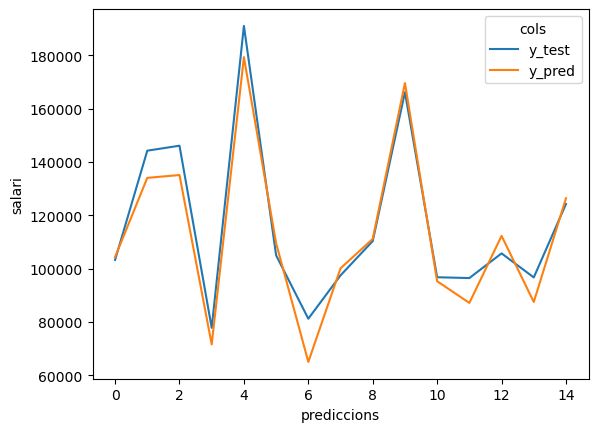

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=dfm, x="prediccions", y="salari", hue="cols")